# **CREDIT RISK PREDICTION**
---
This project aims to build a classification model that predicts the loan_status (Approved or Rejected) based on applicant's financial background, asset profile, and credit score.

Using different python libraries like pandas,matplotlib,and seaborn for EDA and scikit learn for machine learning.

---


## **Dataset Overview**
---
**Source:** https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

**Description:** This dataset contains information about collection of financial records and associated information that is used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution.
It includes 13 columns that are:

- **loan_id**:Unique identifier for each loan application
- **no_of_dependents**:How many people are dependent on that individual
- **education**:It gives education status whether graduate or not
- **self_employed**:It provides information about self employement status (yes/no)
- **income_anumm**:Annual income of individual applying for loan
- **loan_amount**:The loan amount that is requested
- **loan_term**:Duration of the loan in months
- **cibil_score**:Applicant's CIBIL credit score (numeric rating of creditworthiness)
- **residential_assets_value**:Estimated value of applicant's residential assets
- **commercial_assets_value**:Estimated value of commercial assets owned by the applicant
- **luxury_assets_value**:Estimated value of luxury assets like cars, jewelry, etc
- **bank_assets_value**:Total value of assets held in bank accounts
- **loan_status**:Target variable: whether the loan is approved or not (Approved / Rejected)

---


## **STEP 1: LOADING DATA**

In [1]:
# Loading all the necessary libraries that will be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("loan_approval_dataset.csv")

## **STEP 2: Exploratory Data Analysis(EDA)**

### **Data info**

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


### **Null Values**

In [11]:
nullvalues=df.isnull().sum()
print(nullvalues)

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


### This shows that there is no any missing value /null value in any column

### **Summary Statistics of Dataset**

In [9]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [11]:
# Clean column names: strip spaces, make lowercase, and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


### **Visualizing the loan approved status**

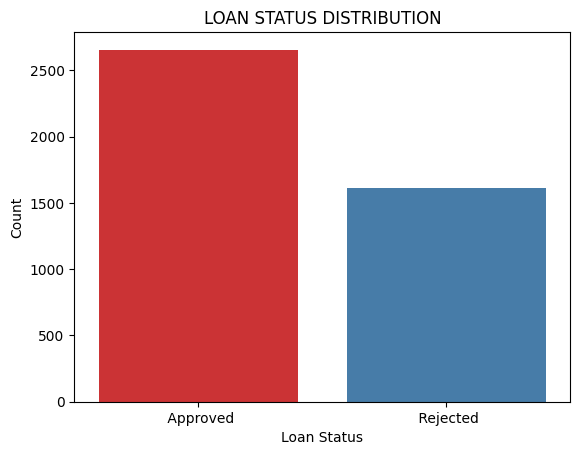

In [13]:
sns.countplot(data=df, x='loan_status',hue='loan_status', palette='Set1')
plt.title("LOAN STATUS DISTRIBUTION")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()


### **Visualizing the Distribution of loan across education**

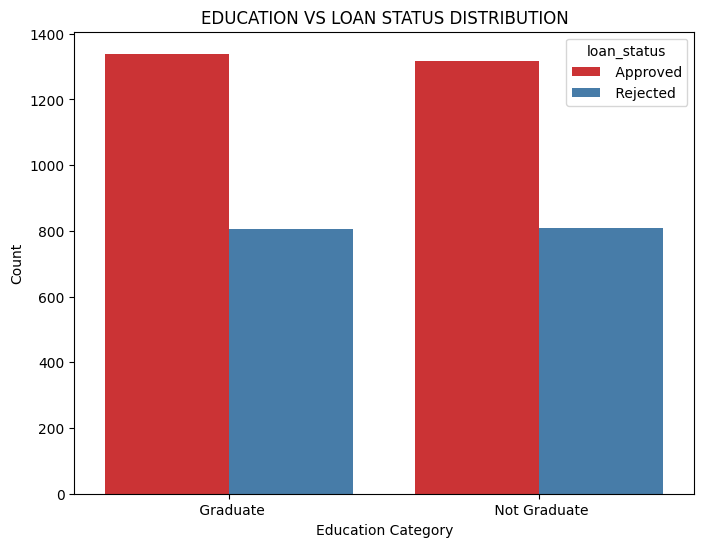

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x="education",hue="loan_status",palette="Set1")
plt.title("EDUCATION VS LOAN STATUS DISTRIBUTION")
plt.xlabel("Education Category")
plt.ylabel("Count")
plt.show()

### **Histogram for Income Distribution**

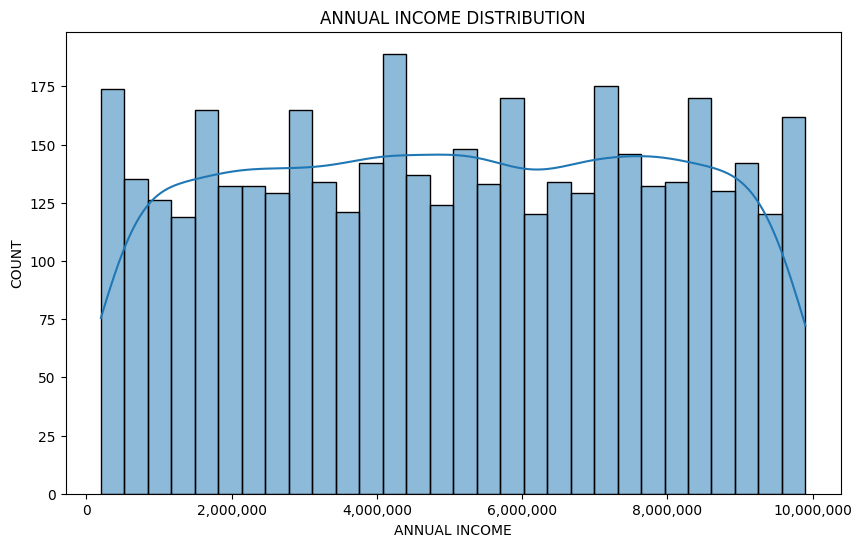

In [17]:
import matplotlib.ticker as mtick
plt.figure(figsize=(10,6))
sns.histplot(df["income_annum"],bins=30,kde=True)
plt.title("ANNUAL INCOME DISTRIBUTION")
plt.xlabel("ANNUAL INCOME")
plt.ylabel("COUNT")
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

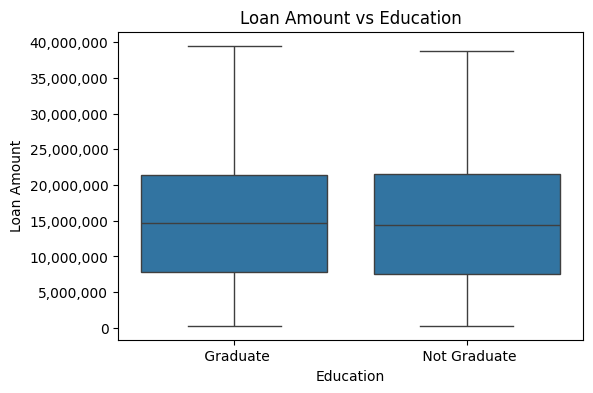

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x="education", y="loan_amount", data=df)
plt.title('Loan Amount vs Education')
plt.xlabel("Education")
plt.ylabel("Loan Amount")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


## Training Model

In [20]:
df.shape

(4269, 13)

In [16]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['loan_status_encoded']=le.fit_transform(df[' loan_status'])

In [16]:
df.columns=df.columns.str.strip()

In [18]:
from sklearn.model_selection import train_test_split
X=df[['income_annum','loan_amount','residential_assets_value',
        'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']]
y=df['loan_status_encoded']
X_train, X_test, y_train, y_test=train_test_split(X, y,train_size=0.7)


In [20]:
X_test

,income_annum,loan_amount,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
4063,1000000,2800000,700000,700000,3900000,700000
1489,3300000,13100000,4800000,4900000,7500000,4300000
621,4900000,17600000,13600000,7500000,12700000,5600000
1708,2400000,9300000,700000,800000,5000000,3400000
1165,5400000,20700000,1900000,800000,19000000,3600000
...,...,...,...,...,...,...
3575,7400000,15400000,22000000,13500000,28900000,7400000
1178,2400000,6600000,6100000,3300000,5600000,3000000
1236,300000,500000,300000,400000,1200000,100000
60,8500000,18900000,23800000,16300000,25900000,11400000


In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
model.predict(X_test.head(4))

array([0, 0, 0, 0])

In [26]:
model.score(X_test,y_test)

0.624512099921936

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.624512099921936
Confusion Matrix:
 [[797   9]
 [472   3]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       806
           1       0.25      0.01      0.01       475

    accuracy                           0.62      1281
   macro avg       0.44      0.50      0.39      1281
weighted avg       0.49      0.62      0.49      1281



## Conclusion

In this project, I worked on predicting whether a loan applicant is likely to default using the Loan Prediction dataset. After cleaning the data and exploring important features like loan amount, education, and income, I trained a Logistic Regression model to make the predictions.
The model achieved an accuracy of about 62%, and while it did a good job identifying applicants who were unlikely to default, it really struggled to detect the ones who were likely to. Out of 475 actual defaulters, it only caught 3,which shows that the model is heavily biased toward the majority class (non-defaulters). This is most likely due to class imbalance in the dataset.

To improve the results, I would suggest using techniques like balancing the classes (either by using class_weight='balanced' or applying SMOTE oversampling) and trying out different models like Random Forests, which are usually better at handling this kind of imbalance.

Overall, the project gave me a good understanding of how machine learning models behave with real-world data — and highlighted how important it is to address imbalanced datasets when building prediction systems like this.